Upload an image file


Saving lena_gray_256.tif to lena_gray_256 (1).tif
Enter border width: 10
1. Replicated border
2. Black border
Enter choice: 2


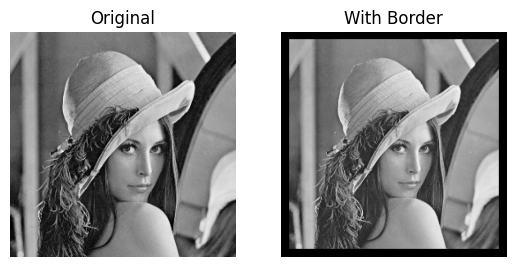

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

print("Upload an image file")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert("L")
w,h=img.size

pad=int(input("Enter border width: "))
print("1. Replicated border\n2. Black border")

ch=int(input("Enter choice: "))
nw,nh=w+2*pad,h+2*pad
res=Image.new(img.mode,(nw,nh),0)
res.paste(img,(pad,pad))

if ch==1:
  for x in range(w):
    t=img.getpixel((x,0));b=img.getpixel((x,h-1))
    for y in range(pad):
      res.putpixel((x+pad,y),t)
      res.putpixel((x+pad,nh-1-y),b)
  for y in range(nh):
    l=res.getpixel((pad,y));r=res.getpixel((pad+w-1,y))
    for x in range(pad):
      res.putpixel((x,y),l)
      res.putpixel((nw-1-x,y),r)

plt.subplot(1,2,1);plt.imshow(img,cmap="gray");plt.axis("off");plt.title("Original")
plt.subplot(1,2,2);plt.imshow(res,cmap="gray");plt.axis("off");plt.title("With Border")
plt.show()
